In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")
import numpy as np
import math as m
import statistics as st
import random
n=116
df = pd.read_csv('Выборка Блохина.csv', delimiter=';')
mean_y=89.0252463054187
mean_x=10.843043995243757
sy=2521.12197188201
sx=10.937331334332836
viborka=[(df["The diameter of pizza in inch"]), (df["pizzaPrice_rupiah"])]

In [2]:
def normalize(df):
    norm_viborka=[]
    for i in range(0,116) :
        xi = (viborka[0][i]-mean_x)/sx
        yi = (viborka[1][i]-mean_y)/sy
        norm_viborka.append([xi,yi])
    return norm_viborka


In [3]:
def make_plot(centroids, cluster):
    X1=np.array(normalize(df))
    centroids=np.array(centroids)
    plt.figure(figsize=(10, 7))      
    scat = sns.scatterplot(X1[:,0],X1[:,1], hue=cluster)
    sns.scatterplot(centroids[:,0], centroids[:, 1], s=250,marker='*', color='g')
    for index,coordinate in enumerate(centroids):
        plt.text(coordinate[0], coordinate[1],index)
    plt.xlabel('The diameter of pizza in inch')
    plt.ylabel('pizzaPrice_rupiah')
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    plt.show()

In [4]:
def get_random_object(norm_viborka):
    return random.choice(norm_viborka)

In [5]:
def get_neighbour_objects(current_object,R, norm_viborka):
    neighbour_objects=[]
  
    for i in range(0,len(norm_viborka)):
        if (np.sqrt((norm_viborka[i][0]-current_object[0])**2 + (norm_viborka[i][1]-current_object[1])**2)<=R):
            neighbour_objects.append(norm_viborka[i])
            
    return neighbour_objects

In [6]:
def center_of_objects(neighbour_objects):
    sum_x=0
    sum_y=0
    for i in range(0, len(neighbour_objects)):
        sum_x+=neighbour_objects[i][0]
        sum_y+=neighbour_objects[i][1]
    center=[sum_x/len(neighbour_objects),sum_y/len(neighbour_objects)]
    return center

In [7]:
def delete_objects(visit_point,norm_viborka):
    points=[p for i,p in enumerate(norm_viborka) if i not in visit_point]
    return points

In [13]:
def FOREL(R,norm_viborka):
    clusters=[]
    centers=[]
    graph=[]
    visit_point=[]
    v=norm_viborka.copy()
    u=0
    cl=normalize(df);
    while(len(norm_viborka)!=0) :
        current_object=get_random_object(norm_viborka)
        neighbour_objects= get_neighbour_objects(current_object,R, norm_viborka)  

        center_object = center_of_objects(neighbour_objects)
        while (center_object != current_object):  
            current_object = center_object; 
            neighbour_objects= get_neighbour_objects(current_object,R,norm_viborka)
            center_object = center_of_objects(neighbour_objects) 
        clusters.append(neighbour_objects)
        centers.append(center_object)
        for x in neighbour_objects:
            for i,y in enumerate(v):
                if x[0]==y[0] and x[1]==y[1]:
                    visit_point.append(i)
        for i in range(0,len(neighbour_objects)): 
            for j in range(0,len(cl)): 
                if (cl[j]==neighbour_objects[i]):
                    cl[j]=u
        u+=1
        norm_viborka=delete_objects(visit_point,v)
    for k in clusters:
        print("Cluster", k,'\n\n') 
    make_plot(centers,cl)

    

Cluster [[0.47150039137685235, 0.012286098824270187], [0.28864042866164236, 0.026168806757624404], [0.6543603540920623, 0.06305714498053704], [0.7000753447708647, 0.02021907478618688], [0.47150039137685235, 0.00831961084331184], [0.7000753447708647, 0.02021907478618688], [0.47150039137685235, 0.00831961084331184], [0.7000753447708647, 0.02021907478618688], [0.47150039137685235, 0.00831961084331184], [0.7000753447708647, 0.03925821709478695], [0.28864042866164236, 0.009906206035695178], [0.5172153820556549, 0.023788913969049395], [0.5172153820556549, 0.023788913969049395], [0.28864042866164236, -0.006753043484329879], [0.5629303727344573, -0.002389906705275698], [0.28864042866164236, 0.0015765812756826493], [0.5629303727344573, 0.010302854833791014], [0.28864042866164236, -0.006753043484329879], [0.5629303727344573, 0.011889450026174352], [0.28864042866164236, -0.006753043484329879], [0.5629303727344573, -0.002389906705275698], [0.28864042866164236, 0.003956474064257658], [0.28864042866

C:\Users\snt_a\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\snt_a\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


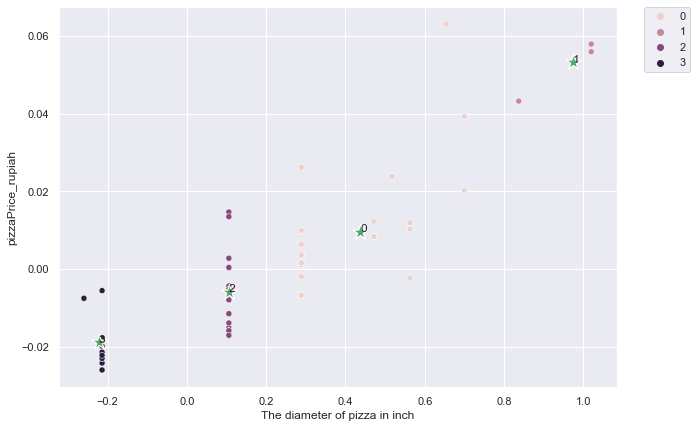

In [14]:
R=0.3 
norm_viborka=normalize(df)
FOREL(R,norm_viborka)

Cluster [[0.28864042866164236, 0.026168806757624404], [0.10578046594643241, 0.00038663488139514514], [0.10578046594643241, 0.00038663488139514514], [0.10578046594643241, 0.00038663488139514514], [0.10578046594643241, 0.00038663488139514514], [0.10578046594643241, 0.00038663488139514514], [0.10578046594643241, 0.00038663488139514514], [0.28864042866164236, 0.009906206035695178], [0.10578046594643241, -0.01706591223482158], [0.28864042866164236, -0.006753043484329879], [0.10578046594643241, -0.01587596584053408], [0.10578046594643241, 0.0027665276699701535], [0.10578046594643241, -0.007942989878617385], [0.28864042866164236, 0.0015765812756826493], [0.10578046594643241, -0.005563097090042376], [0.10578046594643241, 0.01347604521855769], [0.10578046594643241, -0.01706591223482158], [0.28864042866164236, -0.006753043484329879], [0.10578046594643241, -0.005166448291946541], [0.10578046594643241, 0.014665991612845194], [0.10578046594643241, -0.01706591223482158], [0.28864042866164236, -0.006

C:\Users\snt_a\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\snt_a\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


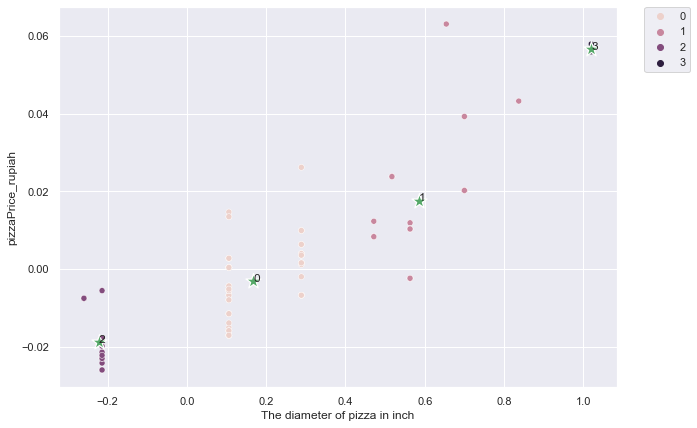

In [15]:
R=0.3-0.00001
norm_viborka=normalize(df)
FOREL(R,norm_viborka)

Cluster [[0.47150039137685235, 0.012286098824270187], [0.28864042866164236, 0.026168806757624404], [0.47150039137685235, 0.00831961084331184], [0.10578046594643241, 0.00038663488139514514], [0.10578046594643241, 0.00038663488139514514], [0.47150039137685235, 0.00831961084331184], [0.10578046594643241, 0.00038663488139514514], [0.10578046594643241, 0.00038663488139514514], [0.47150039137685235, 0.00831961084331184], [0.10578046594643241, 0.00038663488139514514], [0.10578046594643241, 0.00038663488139514514], [0.28864042866164236, 0.009906206035695178], [0.10578046594643241, -0.01706591223482158], [0.28864042866164236, -0.006753043484329879], [0.10578046594643241, -0.01587596584053408], [0.10578046594643241, 0.0027665276699701535], [0.10578046594643241, -0.007942989878617385], [0.28864042866164236, 0.0015765812756826493], [0.10578046594643241, -0.005563097090042376], [0.10578046594643241, 0.01347604521855769], [0.10578046594643241, -0.01706591223482158], [0.28864042866164236, -0.00675304

C:\Users\snt_a\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\snt_a\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


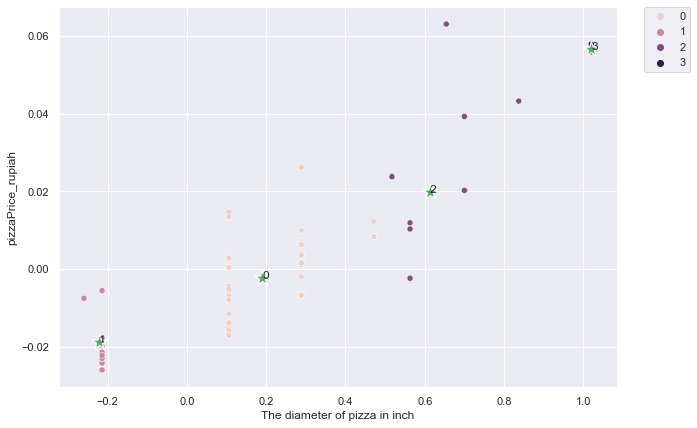

In [16]:
R=0.3+0.00001
norm_viborka=normalize(df)
FOREL(R,norm_viborka)